# Analyzing Data With Python and SQL

## About the dataset

## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork22-2022-01-01), but to summarize, the dataset has the following variables:

* **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

* **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

* **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

* **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

* **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

* **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

* **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

* **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

## Install libraries

In [ ]:
!pip install pandasql

## Import Libraries

In [18]:
import pandas as pd
from pandasql import sqldf as sql

In [20]:
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

In [21]:
df

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


## Problems

### Problem 1: How many rows are in the dataset?

In [35]:
sql("""
select count(*) as rows_total from df
""")

,rows_total
0,78


### Problem 2: How many community areas in Chicago have a hardship index greater than 50.0?

In [37]:
sql("""
SELECT 
    COUNT(*) 
FROM df 
WHERE hardship_index > 50;
""")

,COUNT(*)
0,38


### Problem 3: What is the maximum value of hardship index in this dataset?

In [39]:
sql("""
SELECT
    MAX(hardship_index)
FROM df;
""")

,MAX(hardship_index)
0,98.0


### Problem 4: Which community area which has the highest hardship index?

In [46]:
# MAX() function
sql("""
SELECT
    community_area_name,
    MAX(hardship_index) as hardship_index
FROM df;
""")

# # Using subquery
sql("""
SELECT
    community_area_name,
    hardship_index
FROM df
WHERE hardship_index = (
    SELECT
        MAX(hardship_index)
    FROM df
);
""")

,community_area_name,hardship_index
0,Riverdale,98.0


### Problem 5: Which Chicago community areas have per-capita incomes greater than $60,000?

In [54]:
sql("""
SELECT
    community_area_name,
    per_capita_income_
FROM df
WHERE per_capita_income_ > 60000;
""")

,community_area_name,per_capita_income_
0,Lake View,60058
1,Lincoln Park,71551
2,Near North Side,88669
3,Loop,65526


### Problem 6: Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables

In [67]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
income_vs_hardship = sql("""
SELECT per_capita_income_, hardship_index FROM df;
""")

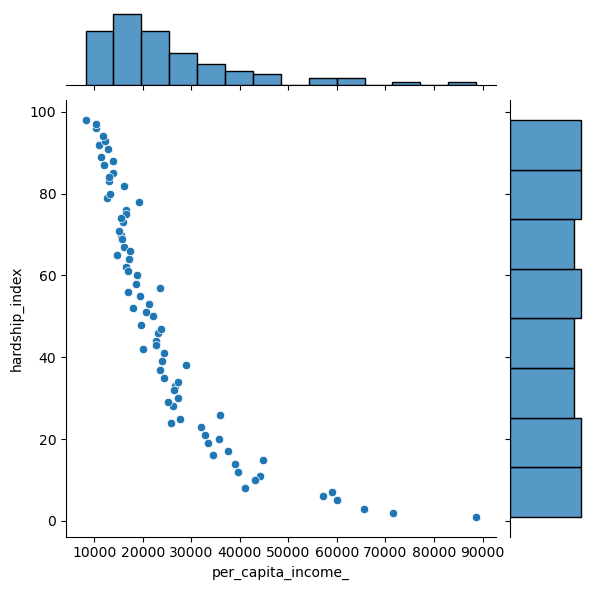

In [69]:
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship)

In [ ]:
Answer: You can see that as Per Capita Income rises as the Hardship Index
decreases. We see that the points on the scatter plot are somewhat closer
to a straight line in the negative direction, so we have a negative
correlation between the two variables.